Epoch 1 = Training Loss = 27.391734797428743, Validation Loss = 6.381684479943241
Epoch 2 = Training Loss = 4.544537827327533, Validation Loss = 2.3713603091527182
Epoch 3 = Training Loss = 2.5072651833205786, Validation Loss = 1.3492126967533524
Epoch 4 = Training Loss = 1.8395556400549735, Validation Loss = 1.024119456130338
Epoch 5 = Training Loss = 1.4695223662608339, Validation Loss = 0.8296320686139256
Epoch 6 = Training Loss = 1.1896524567078248, Validation Loss = 0.695022030767188
Epoch 7 = Training Loss = 0.9905293509139035, Validation Loss = 0.6173637979720012
Epoch 8 = Training Loss = 0.8458414578365775, Validation Loss = 0.5716170463935438
Epoch 9 = Training Loss = 0.742806636179682, Validation Loss = 0.5371522174542209
Epoch 10 = Training Loss = 0.6584363014316271, Validation Loss = 0.512592022677502
Epoch 11 = Training Loss = 0.5937519073036142, Validation Loss = 0.4945425495325801
Epoch 12 = Training Loss = 0.5430125247495772, Validation Loss = 0.4743554723190974
Epoch 1

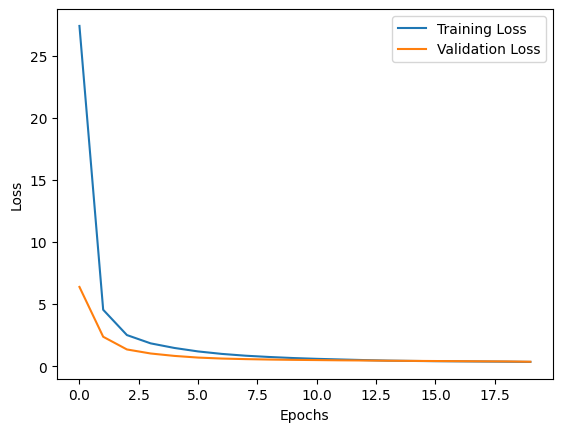

In [ ]:
import numpy as np
import torch
from torch import nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
import matplotlib.pyplot as plt


class RegressionModel(nn.Module):
    def __init__(self, input, hidden1, hidden2 , output):
        super(RegressionModel, self).__init__()
        self.W1 = torch.randn(input, hidden1, requires_grad=True)
        self.b1 = torch.randn(hidden1, requires_grad=True)
        self.W2 = torch.randn(hidden1, hidden2, requires_grad=True)
        self.b2 = torch.randn(hidden2, requires_grad=True)
        # self.W3 = torch.randn(hidden2, hidden3, requires_grad=True)
        # self.b3 = torch.randn(hidden3, requires_grad=True)
        # self.W4 = torch.randn(hidden3, hidden4, requires_grad=True)
        # self.b4 = torch.randn(hidden4, requires_grad=True)
        # self.W5 = torch.randn(hidden4, hidden5, requires_grad=True)
        # self.b5 = torch.randn(hidden5, requires_grad=True)
        # self.W6 = torch.randn(hidden5, hidden6, requires_grad=True)
        # self.b6 = torch.randn(hidden6, requires_grad=True)
        self.W7 = torch.randn(hidden2, output, requires_grad=True)
        self.b7 = torch.randn(output, requires_grad=True)

    def forward(self, X):
      HLayer1 = torch.mm(X, self.W1) + self.b1
      HLayer1 = torch.relu(HLayer1)
      HLayer2 = torch.mm(HLayer1, self.W2) + self.b2
      HLayer2 = torch.relu(HLayer2)
      # HLayer3 = torch.mm(HLayer2, self.W3) + self.b3
      # HLayer3 = torch.relu(HLayer3)
      # HLayer4 = torch.mm(HLayer3, self.W4) + self.b4
      # HLayer4 = torch.relu(HLayer4)
      # HLayer5 = torch.mm(HLayer4, self.W5) + self.b5
      # HLayer5 = torch.relu(HLayer5)
      # HLayer6 = torch.mm(HLayer5, self.W6) + self.b6
      # HLayer6 = torch.relu(HLayer6)
      output = torch.mm(HLayer2, self.W7) + self.b7
      # output = torch.relu(output)

      return output

data = datasets.fetch_california_housing()

Scaler = StandardScaler()

x_data  = np.array(data.data)
y_data = np.array(data.target).reshape(-1,1)

x = Scaler.fit_transform(x_data)
y = Scaler.fit_transform(y_data)

train_data = torch.tensor(x,dtype=torch.float32)
test_data = torch.tensor(y,dtype=torch.float32)


x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=42)

Train = TensorDataset(x_train, y_train)
Test = TensorDataset(x_test, y_test)

BatchSize= 50
epochs = 20

Train_loader = DataLoader(dataset= Train, batch_size=BatchSize, shuffle=True)
Test_loader = DataLoader(dataset= Test, batch_size=BatchSize, shuffle=True)
Epoch_Losses = []
val_losses = []


input = 8
h1,h2 = 12,10
output=1
model = RegressionModel(input,h1,h2,output)
lossFunction = nn.MSELoss()
optimizer = optim.Adam([model.W1,model.b1,model.W2,model.b2,model.W7,model.b7], lr=0.001)


for epoch in range(epochs):
  batch_loss = 0
  for x_batch, y_batch in Train_loader:
        model.train()
        yhat = model(x_batch)
        loss = lossFunction(yhat, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()

  batch_loss /= len(Train_loader)
  Epoch_Losses.append(batch_loss)

  model.eval()
  val_loss= 0
  with torch.no_grad():
    for x_batch, y_batch in Test_loader:
      yhat = model(x_batch)
      loss = lossFunction(yhat, y_batch)
      val_loss += loss.item()

  val_loss /= len(Test_loader)
  val_losses.append(val_loss)

  print(f"Epoch {epoch+1} = Training Loss = {batch_loss}, Validation Loss = {val_loss}")


plt.plot(Epoch_Losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




